## **IMPORTING AND UPLOADING NECESSARY FILES**

---




In [6]:
from google.colab import files
files.upload()

{}

In [7]:
!pip install kaggle

In [8]:
!pip install ipython-autotime
%load_ext autotime

time: 212 µs (started: 2021-08-28 05:14:18 +00:00)


In [9]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


%matplotlib inline

time: 41.4 ms (started: 2021-08-28 05:14:18 +00:00)


## **EXPLORATORY DATA ANALYSIS**

---




In [10]:
df = pd.read_csv('bt_dataset_t3.csv')
df.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


time: 58.5 ms (started: 2021-08-28 05:14:18 +00:00)


In [11]:
df.shape

(1644, 19)

time: 6.22 ms (started: 2021-08-28 05:14:18 +00:00)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [13]:
df.isnull().sum()

Image                   0
Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
Coarseness              0
PSNR                    0
SSIM                  369
MSE                     0
DC                     98
Target                  0
dtype: int64

time: 8.1 ms (started: 2021-08-28 05:14:18 +00:00)


In [14]:
df.loc[0:5, ["Mean"]]

,Mean
0,23.448517
1,4.398331
2,3.244263
3,8.511353
4,21.000793
5,0.000000


time: 24 ms (started: 2021-08-28 05:14:18 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


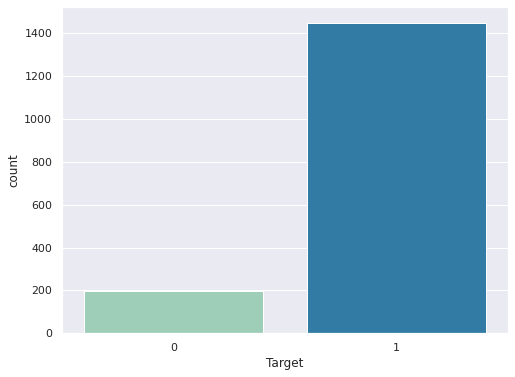

time: 191 ms (started: 2021-08-28 05:14:19 +00:00)


In [15]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.countplot(df['Target'],palette="YlGnBu")

In [16]:
from skimage.io import imread

brain_df=pd.read_csv("/content/Brain Tumor.csv")

time: 140 ms (started: 2021-08-28 05:14:19 +00:00)


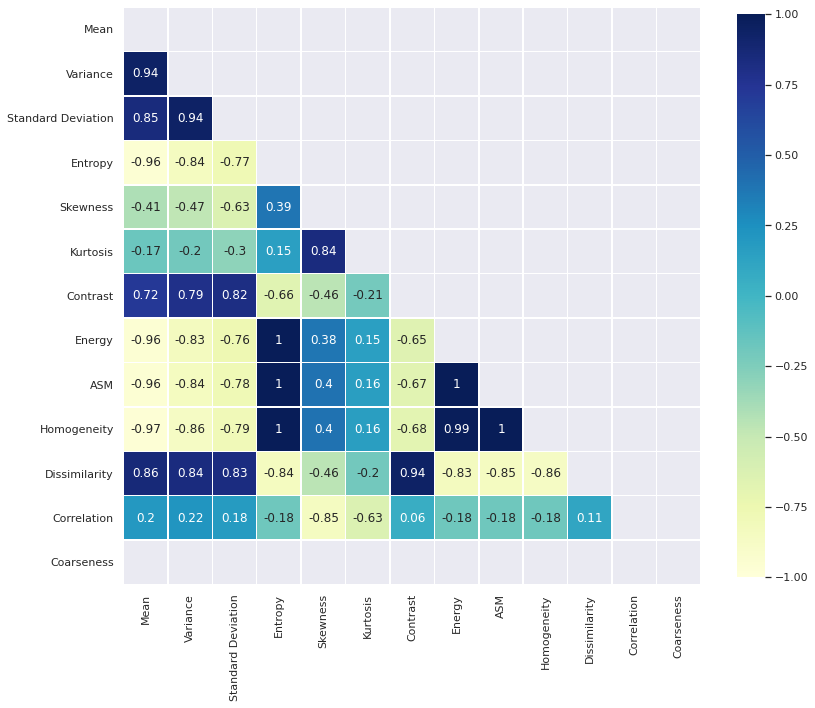

time: 1.12 s (started: 2021-08-28 05:14:19 +00:00)


In [17]:
corr = df[df.columns[1:14]].corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 16))

cmap = sns.diverging_palette(250, 0, as_cmap="False")


sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

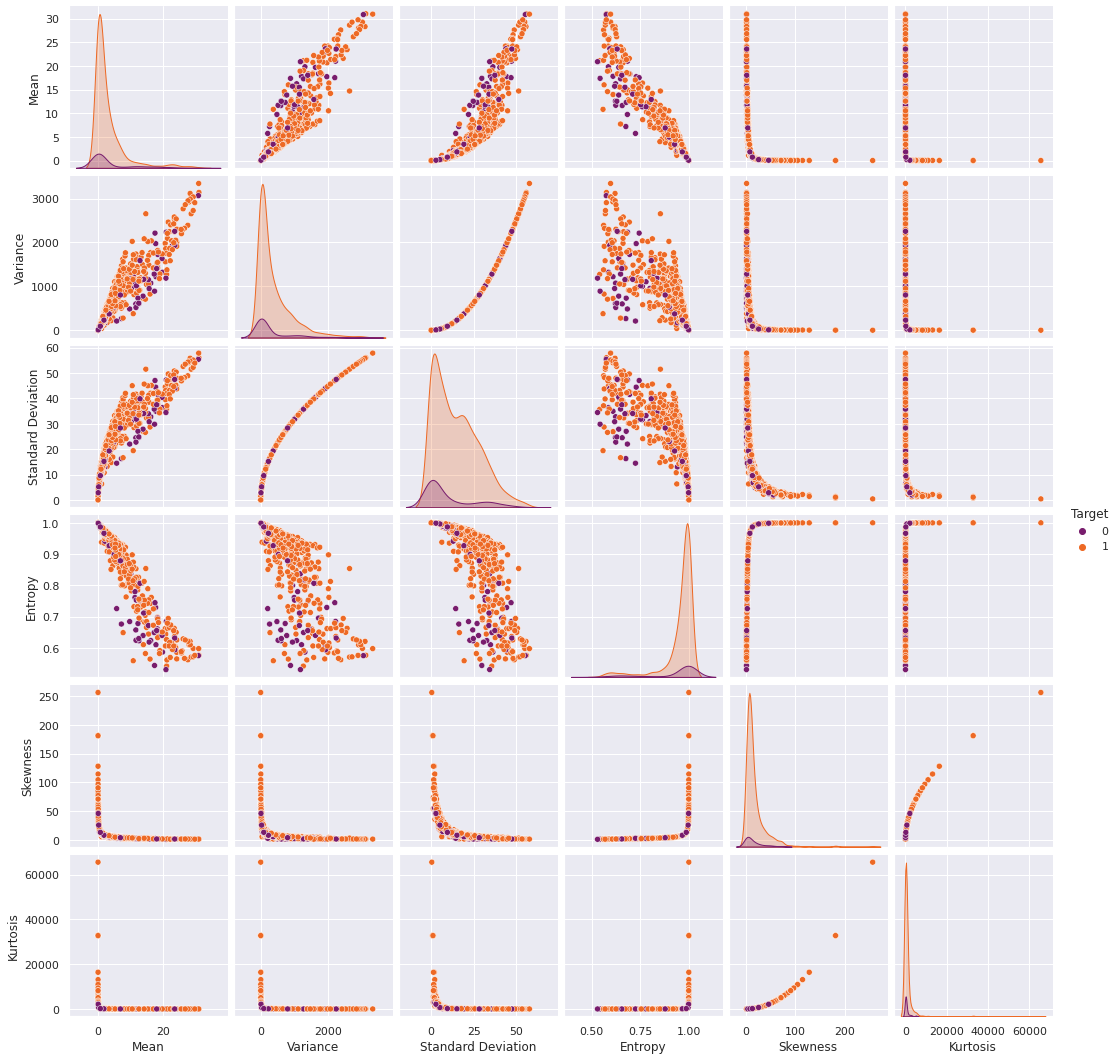

time: 24.5 s (started: 2021-08-28 05:14:20 +00:00)


In [18]:
cols = ['Target',
        'Mean', 
        'Variance', 
        'Standard Deviation', 
        'Entropy', 
        'Skewness', 
        'Kurtosis']

sns.pairplot(data=df[cols], hue='Target', palette='inferno')

## **DATA PRE-PROCESSING TO FIT IN A MODEL**

---




In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

time: 9.55 ms (started: 2021-08-28 05:14:44 +00:00)


In [20]:
y = df['Target']
X = df.drop(['Image', 'Target'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan)

time: 4.35 ms (started: 2021-08-28 05:14:45 +00:00)


In [21]:
def process_na_columns(df, tolerance=0.3):

    dataset_size = df.shape[0]
    tolerate_na_size = int(dataset_size * tolerance)  
    for c in df.columns:
        na_counts = df[c].isna().sum()
        
        if na_counts != 0:
            if na_counts > tolerate_na_size:
                df = df.drop([c], axis=1)
            else:
                if df[c].dtypes == 'object':
                    values = df[c].value_counts()
                    max_val = values.index[0] # Highest Occurrence
                    df[c].replace(to_replace=pd.np.nan, value=max_val, inplace=True)
                else:
                    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                    data = df[c].values.reshape(-1, 1)
                    imputed_values = imputer.fit_transform(data)
                    df[c] = imputed_values
    return df

time: 15.8 ms (started: 2021-08-28 05:14:45 +00:00)


In [22]:
X = process_na_columns(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

time: 20.3 ms (started: 2021-08-28 05:14:45 +00:00)


## **COMPARING KNN, LOGISTIC REGRESSION & RANDOM FOREST MODEL**

---

In [41]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=5)
# Random Forest
model3 = RandomForestClassifier(n_estimators=100,random_state=1)


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


time: 448 ms (started: 2021-08-28 05:43:20 +00:00)


## **COMPARING KNN, LOGISTIC REGRESSION MODEL & RANDOM FOREST MODEL**

---

In [50]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

time: 15.4 ms (started: 2021-08-28 05:49:05 +00:00)


In [88]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

print("logistic regresiion auc_score :", auc_score1)
print("kNN auc_score :",auc_score2)
print("Random Forest auc_score :",auc_score3)

0.8067796610169491 0.8541874376869392 0.9993020937188435
logistic regresiion auc_score : 0.8067796610169491
kNN auc_score : 0.8541874376869392
Random Forest auc_score : 0.9993020937188435
time: 14.2 ms (started: 2021-08-28 06:14:24 +00:00)


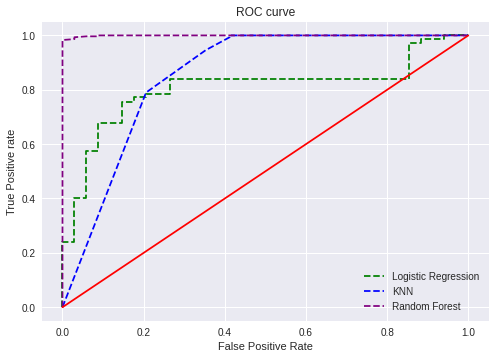

time: 1.15 s (started: 2021-08-28 05:50:30 +00:00)


In [54]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [56]:
from sklearn.metrics import confusion_matrix

y_pred1=model1.predict(X_test)
y_true1=y_test

y_pred2=model2.predict(X_test)
y_true2=y_test

y_pred3=model3.predict(X_test)
y_true3=y_test

time: 42.3 ms (started: 2021-08-28 05:51:47 +00:00)


time: 20.1 ms (started: 2021-08-28 05:14:46 +00:00)


In [31]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[  2,  32],
       [  4, 291]])

time: 8.16 ms (started: 2021-08-28 05:14:46 +00:00)


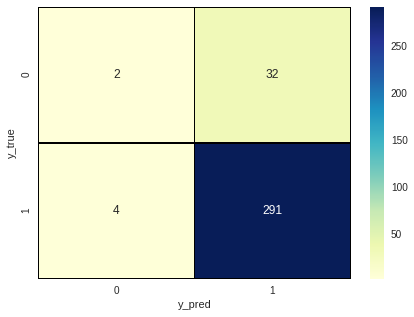

time: 261 ms (started: 2021-08-28 06:08:58 +00:00)


In [87]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm1,annot=True,fmt=".0f",ax=ax, cmap="YlGnBu",linewidths=0.5, linecolor='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [33]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[ 20,  14],
       [  2, 293]])

time: 7.52 ms (started: 2021-08-28 05:14:46 +00:00)


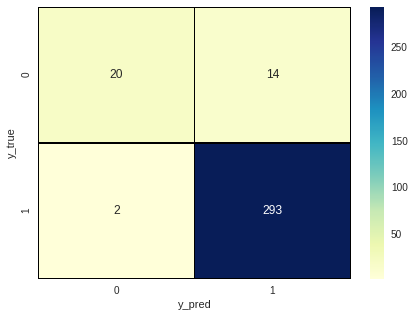

time: 272 ms (started: 2021-08-28 06:08:52 +00:00)


In [86]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm2,annot=True,fmt=".0f",ax=ax, cmap="YlGnBu",linewidths=0.5, linecolor='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [81]:
cm3=confusion_matrix(y_test,y_pred3)
cm3

array([[ 32,   2],
       [  1, 294]])

time: 7.39 ms (started: 2021-08-28 06:02:56 +00:00)


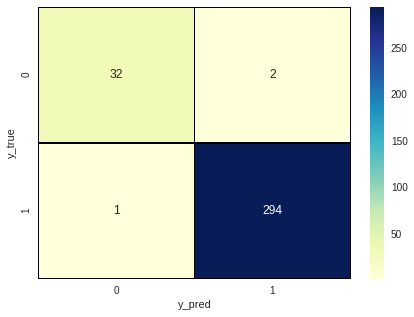

time: 253 ms (started: 2021-08-28 06:08:37 +00:00)


In [85]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm3,annot=True,fmt=".0f",ax=ax, cmap="YlGnBu",linewidths=0.5, linecolor='black')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [84]:
print("logistic regresiion score :",model1.score(X_test, y_test))
print("kNN score :",model2.score(X_test, y_test))
print("Random Forest score :",model3.score(X_test, y_test))

logistic regresiion score : 0.8905775075987842
kNN score : 0.9513677811550152
Random Forest score : 0.9908814589665653
time: 40.6 ms (started: 2021-08-28 06:05:40 +00:00)
